## **FINAL PROJECT KELOMPOK IF-43-PIL-IS01**


* FAHMI RAZAN RAMDANI 1301194054
* ADHAN MULYA RAHMAWAN 1301194452

**Deteksi Objek dalam Video menggunakan OpenCV 
dan YOLOv3: Analisis Deteksi Object dan Object 
Tracking**

## **Problem Statement**

Deteksi objek dalam video merupakan tantangan penting dalam bidang visi komputer. Meskipun telah ada banyak metode dan teknik yang dikembangkan, masih ada kebutuhan untuk meningkatkan keakuratan dan efisiensi deteksi objek dalam konteks video. Hal ini disebabkan oleh kompleksitas pergerakan objek, variasi kondisi pencahayaan, dan kecepatan pemrosesan yang diperlukan untuk analisis video secara real-time. Oleh karena itu, dalam penelitian ini, kami berfokus pada penggunaan OpenCV dan YOLOv3 untuk deteksi objek dalam video dengan tujuan mengatasi tantangan ini dan meningkatkan kinerja deteksi objek dalam konteks video secara akurat dan efisien.

## **Related Works**

Dalam penelitian ini, kami merujuk pada artikel "ImageNet Large Scale Visual Recognition Challenge" yang ditulis oleh Olga Russakovsky, Jia Deng, Hao Su, Jonathan Krause, Sanjeev Satheesh, Sean Ma, Zhiheng Huang, Andrej Karpathy, Aditya Khosla, Michael Bernstein, Alexander C. Gunung, dan Li Fei-Fei yang menyoroti pentingnya deteksi visual skala besar dan menantang komunitas visi komputer untuk mengembangkan model akurat dalam mendeteksi dan mengklasifikasikan objek dalam dataset ImageNet. Kami menggunakan konsep dan metode yang dijelaskan dalam artikel tersebut sebagai dasar untuk mengembangkan deteksi dan klasifikasi kendaraan dalam video menggunakan OpenCV dan model YOLOv3 yang telah dilatih sebelumnya.

## **Your Approach and Results**

In [ ]:
from google.colab import files

# Upload file
uploaded = files.upload()

Saving road_video_compressed2.mp4 to road_video_compressed2.mp4
Saving yolov3.cfg to yolov3.cfg
Saving yolov3.txt to yolov3.txt
Saving yolov3.weights to yolov3.weights


In [ ]:
#Library yang digunakan
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Muat pre-trained model dan konfigurasinya
net = cv2.dnn.readNet("/content/yolov3.weights", "/content/yolov3.cfg")

# Muat label kelas
classes = []
with open("/content/yolov3.txt", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Tetapkan warna random untuk setiap kelas
colors = [(0, 255, 0) for _ in range(len(classes))]

In [ ]:
# upload video
cap = cv2.VideoCapture("/content/road_video_compressed2.mp4")  # Specify the path to the input video

# Dapatkan dimensi video dan FPS
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Buat objek VideoWriter untuk menyimpan video keluaran
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video = cv2.VideoWriter('output_video_final.mp4', fourcc, fps, (width, height))

# Variabel untuk melacak jumlah frame
frame_count = 0

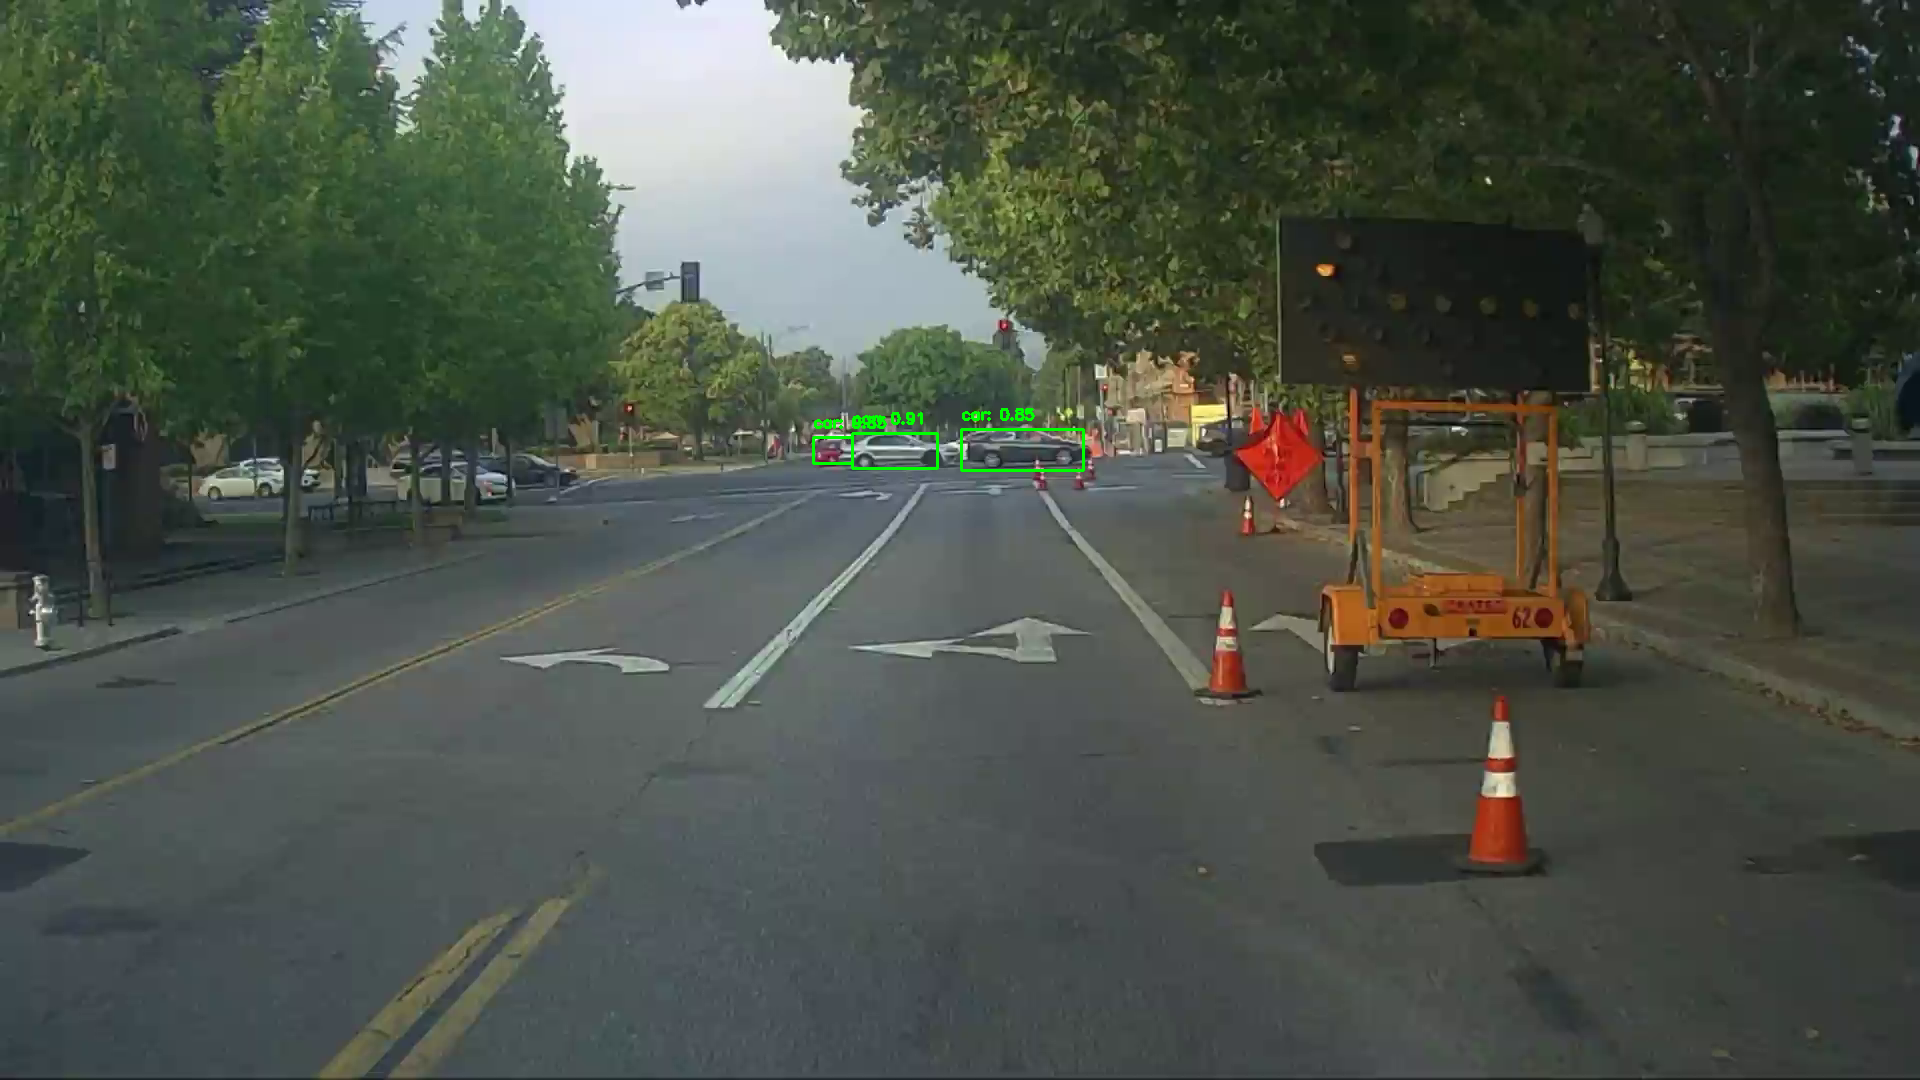

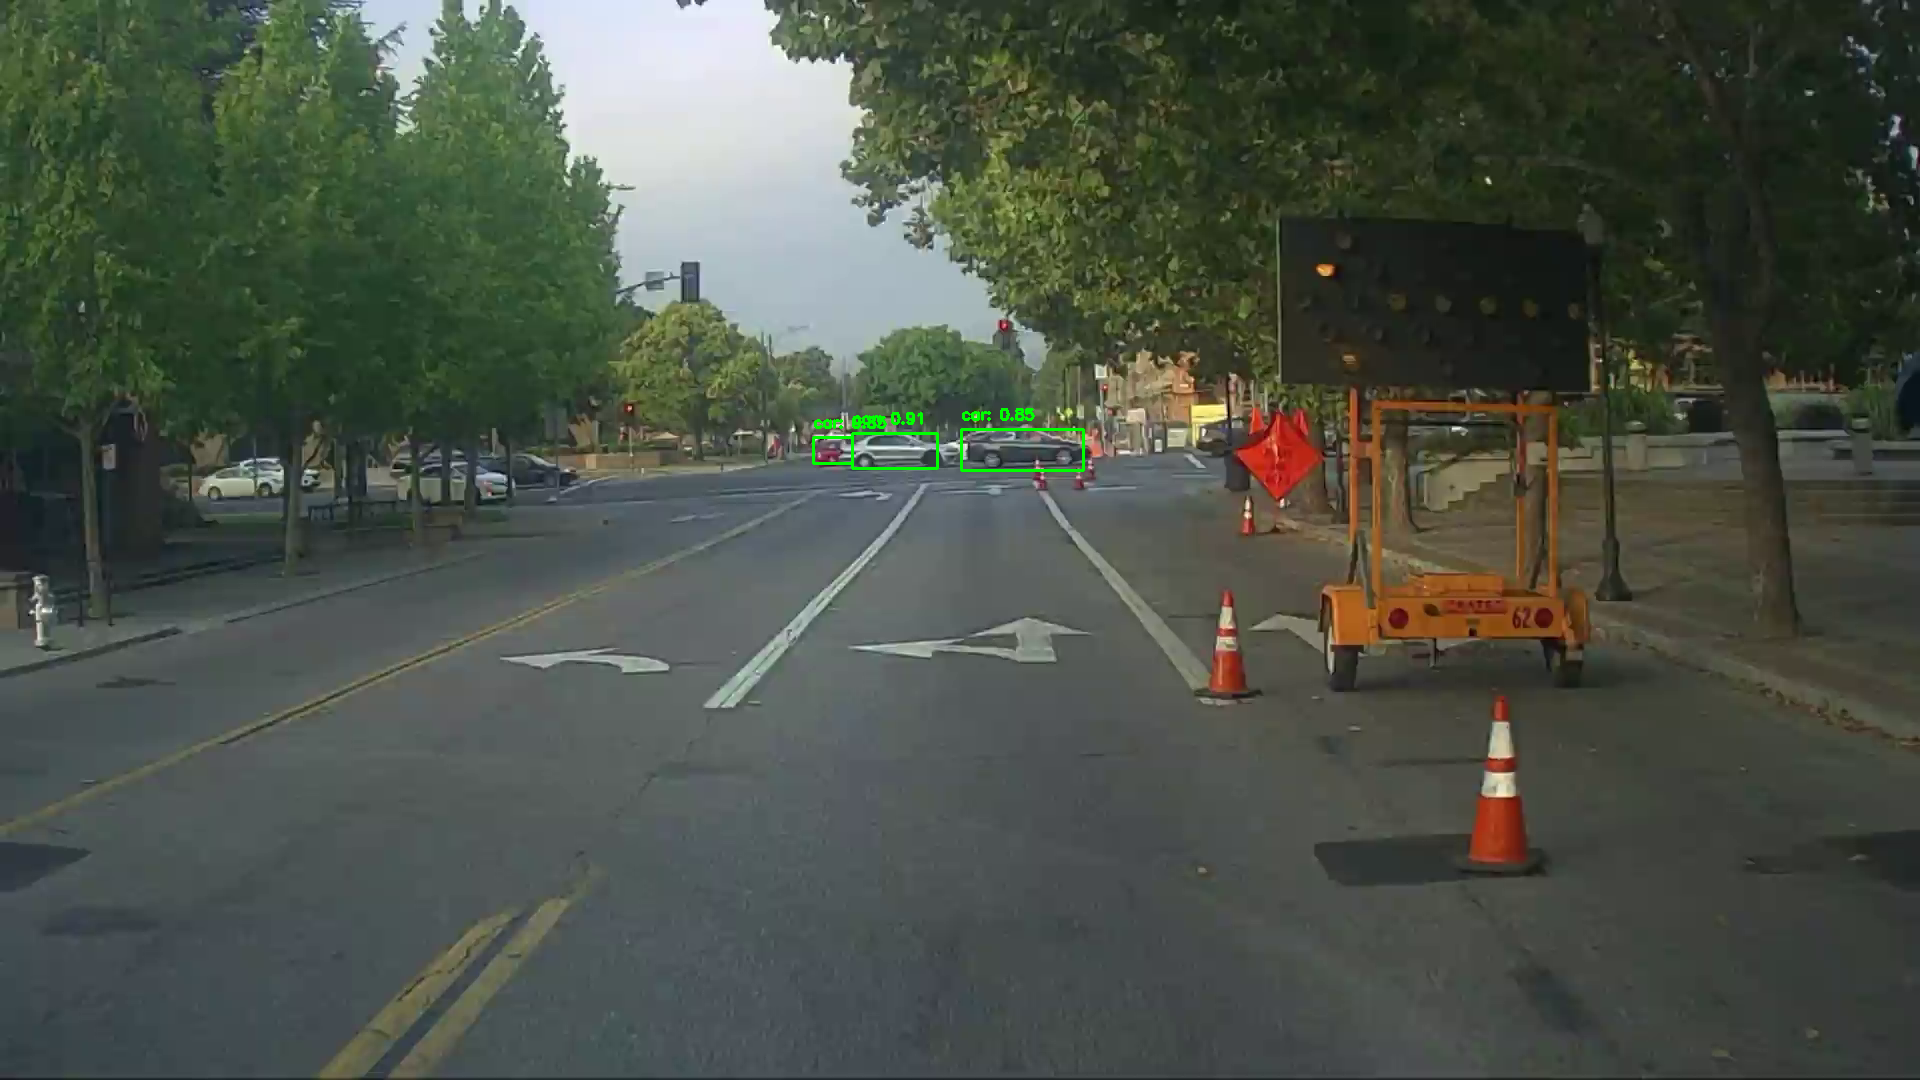

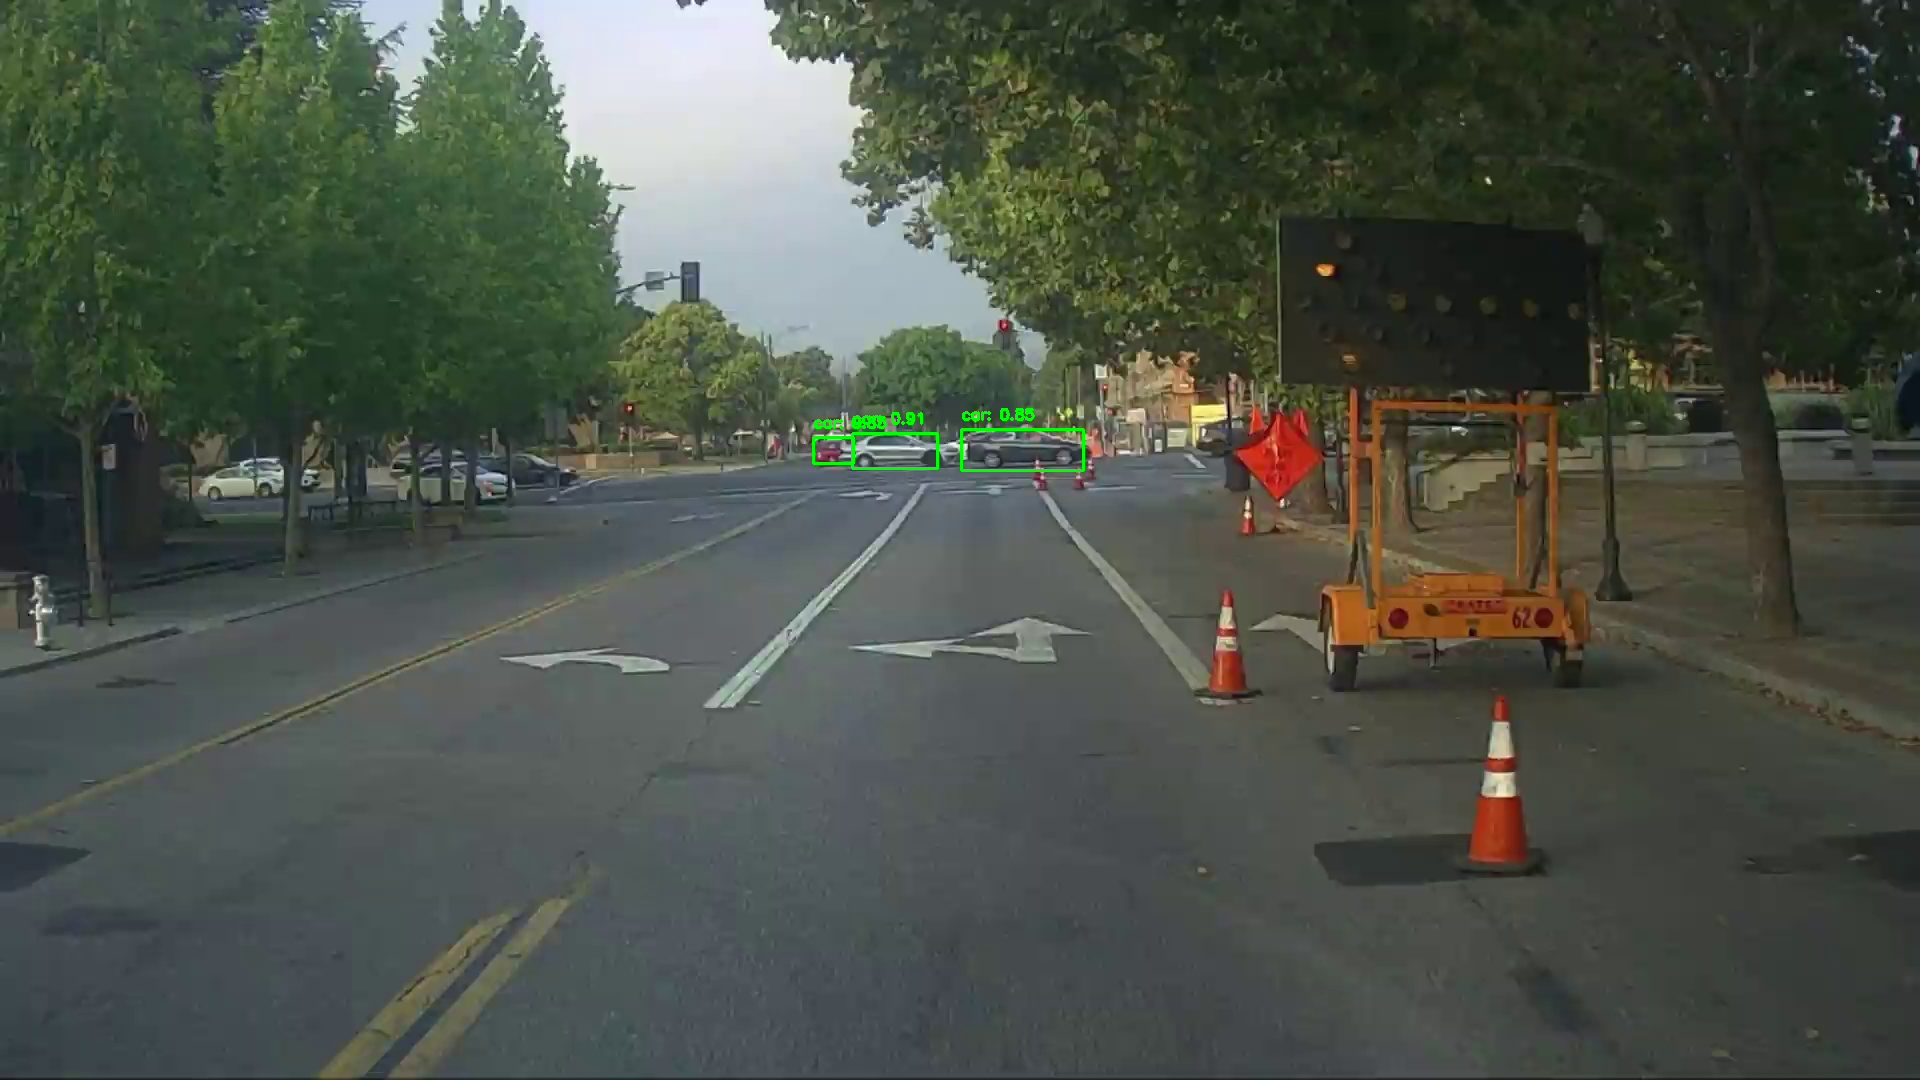

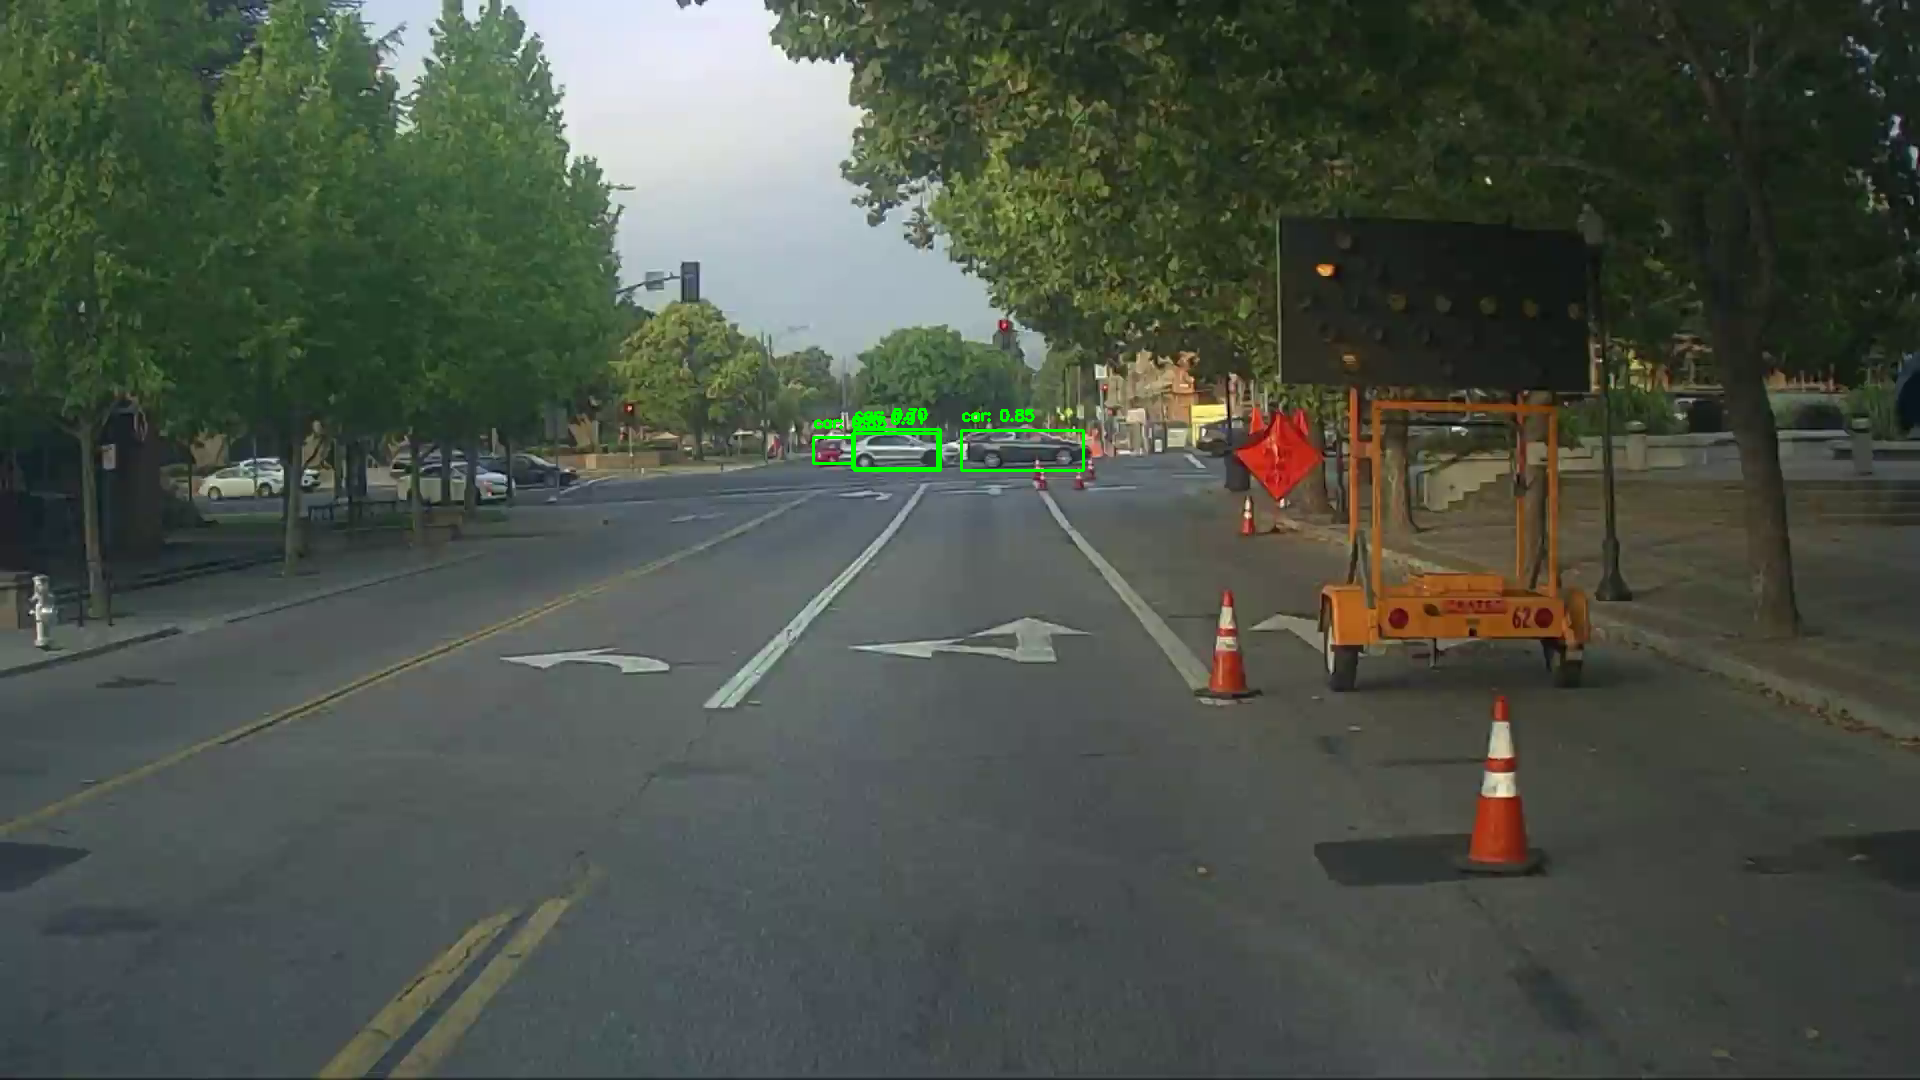

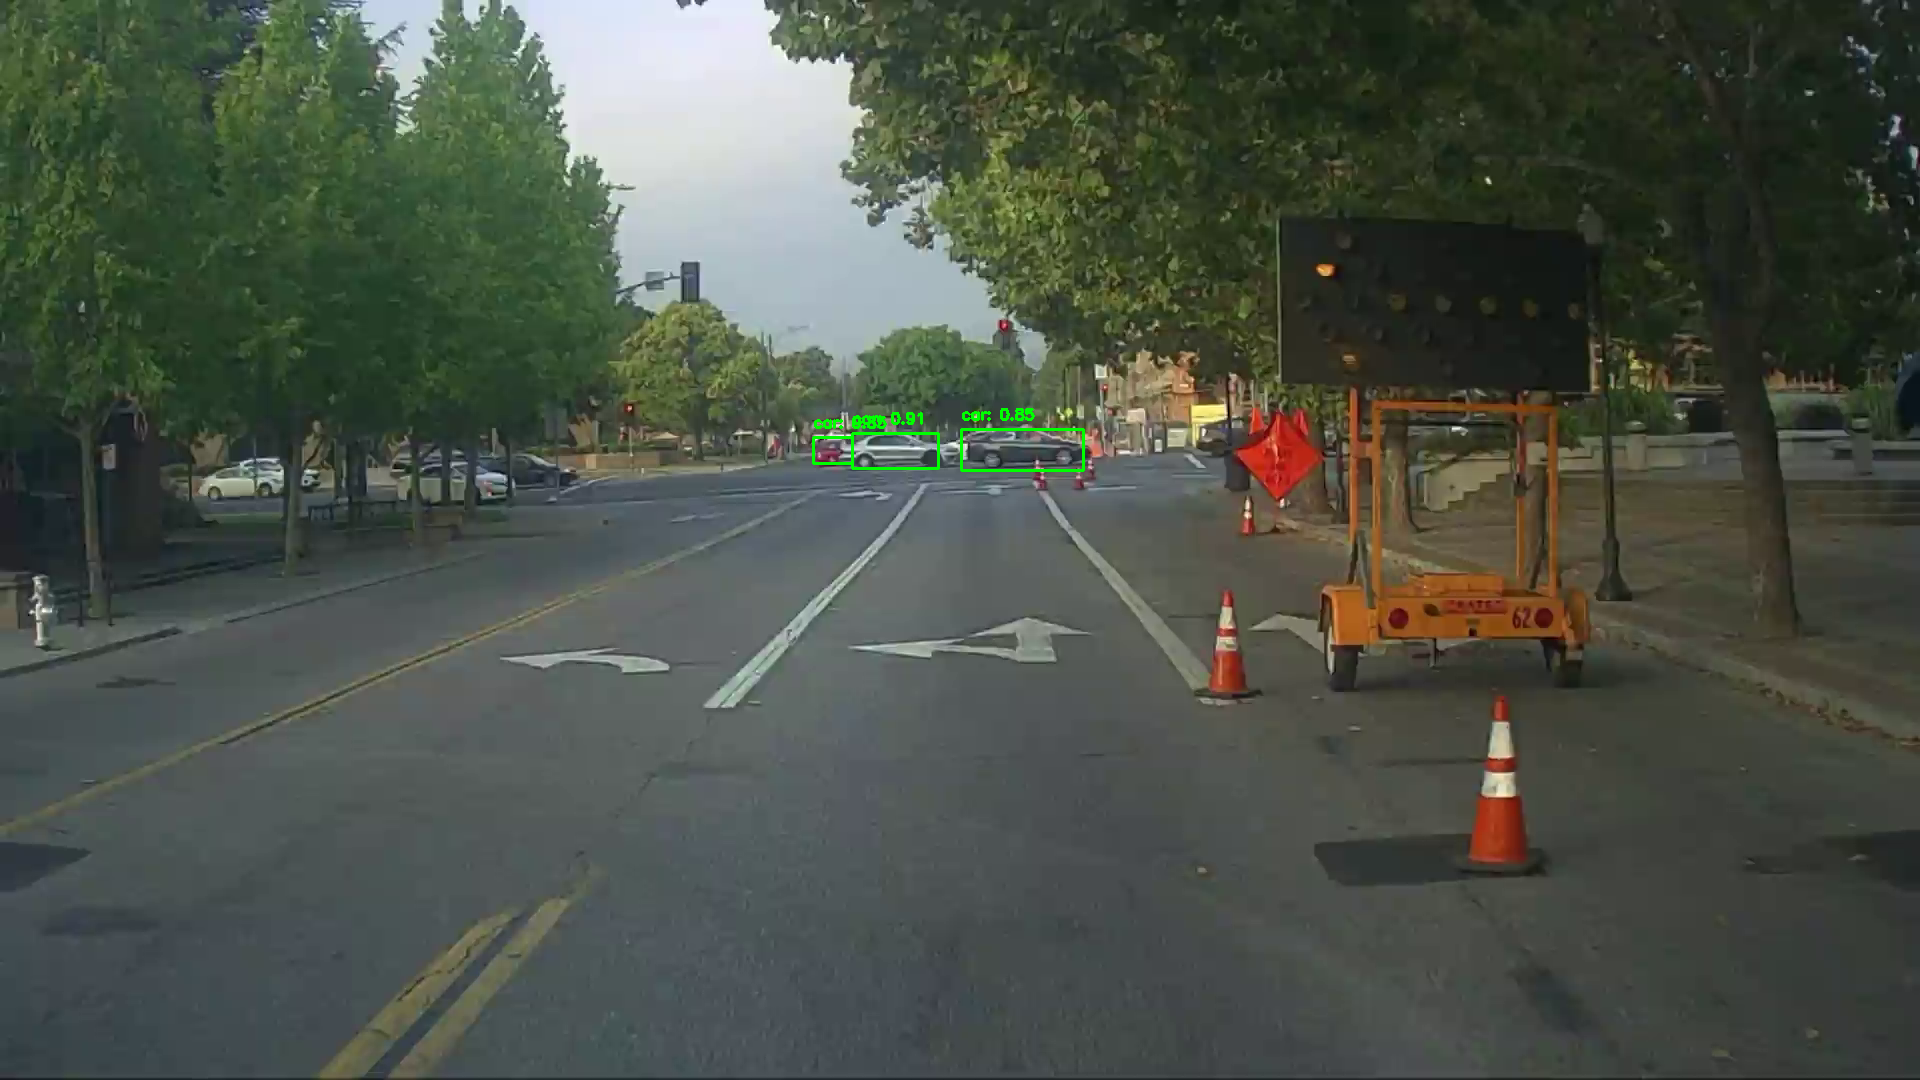

In [ ]:
# Kamus untuk menyimpan jumlah objek per label
object_count = {}
total_objects = 0

# Loop frame
while True:
    # Read frame
    ret, frame = cap.read()

    if ret:
        # Perform object detection
        blob = cv2.dnn.blobFromImage(frame, 1/255.0, (416, 416), swapRB=True, crop=False)
        net.setInput(blob)
        detections = net.forward()

        # Process each detection
        for detection in detections:
            scores = detection[5:]
            class_id = scores.argmax()
            confidence = scores[class_id]

            if confidence >= 0.7:
                # Dapatkan koordinat bounding box
                center_x = int(detection[0] * frame.shape[1])
                center_y = int(detection[1] * frame.shape[0])
                width = int(detection[2] * frame.shape[1])
                height = int(detection[3] * frame.shape[0])
                x = int(center_x - width/2)
                y = int(center_y - height/2)

                # Gambar bounding box dan label
                cv2.rectangle(frame, (x, y), (x + width, y + height), colors[class_id], 2)
                label = f"{classes[class_id]}: {confidence:.2f}"
                cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[class_id], 2)

                # Hitung objek bila objek itu pertama kali muncul di dalam frame
                if label not in object_count:
                    object_count[label] = 1
                else:
                    # Periksa apakah objek muncul di frame sebelumnya
                    prev_label = f"{classes[class_id]}: {confidence:.2f}"
                    if prev_label not in object_count:
                        object_count[label] += 1

                # Tingkatkan jumlah total objek
                total_objects += 1

        # Output 5 frame pertama secara terpisah
        if frame_count < 5:
            cv2_imshow(frame)
        else:
            # Write frame dengan deteksi objek ke video output
            output_video.write(frame)

        # Iterasi frame
        frame_count += 1

        # Tekan 'q' untuk exit
        if cv2.waitKey(1) == ord('q'):
            break

    else:
        break

In [ ]:
# Output objek yang muncul dengan nilai confidencenya
for label, count in object_count.items():
    print(f"{label}: {count}")

car: 0.85: 1
car: 0.91: 1
car: 0.70: 1
traffic light: 0.72: 1
car: 0.96: 1
car: 0.88: 1
car: 0.93: 1
car: 0.94: 1
car: 0.99: 1
car: 0.98: 1
car: 0.74: 1
car: 0.73: 1
car: 0.79: 1
traffic light: 0.73: 1
traffic light: 0.96: 1
car: 0.78: 1
car: 0.86: 1
car: 0.72: 1
car: 0.97: 1
car: 0.84: 1
car: 0.90: 1
traffic light: 0.91: 1
truck: 0.85: 1
truck: 0.74: 1
car: 0.92: 1
car: 0.81: 1
car: 0.82: 1
car: 0.87: 1
truck: 0.75: 1
traffic light: 0.88: 1
traffic light: 0.87: 1
car: 0.76: 1
car: 0.75: 1
car: 0.89: 1
traffic light: 0.97: 1
car: 0.95: 1
car: 0.71: 1
car: 0.77: 1
traffic light: 0.92: 1
traffic light: 0.90: 1
person: 0.77: 1
traffic light: 0.75: 1
traffic light: 0.77: 1
person: 0.71: 1
traffic light: 0.74: 1
traffic light: 0.76: 1
traffic light: 0.81: 1
traffic light: 0.80: 1
traffic light: 0.79: 1
person: 0.78: 1
person: 0.74: 1
person: 0.75: 1
car: 0.80: 1
person: 0.76: 1
person: 0.72: 1
person: 0.88: 1
person: 0.82: 1
car: 0.83: 1
person: 0.81: 1
person: 0.83: 1
person: 0.85: 1
perso

In [ ]:
# Inisialisasi kamus untuk menyimpan jumlah total object per label
total_count_per_label = {}

# Hitung objek per label
for label in object_count:
    # Ekstrak nama label dari full string label
    label_name = label.split(':')[0]
    
    # Memeriksa apakah nama label sudah ada di kamu
    if label_name in total_count_per_label:
        # Jika ada, tambahkan increment dengan 1
        total_count_per_label[label_name] += 1
    else:
        # Jika tidak ada, set hitungan ke 1
        total_count_per_label[label_name] = 1

# Output jumlah objek total per label
print("\n Jumalh total Object per Label:")
for label, count in total_count_per_label.items():
    print(f"{label}: {count}")

# Hitung jumlah total objek
total_objects = sum(object_count.values())

# Output jumlah total objek
print(f"\n Jumlah Total Object Keseluruhan: {total_objects}")

# Release video capture dan output video
cap.release()
output_video.release()
cv2.destroyAllWindows()


 Jumalh total Object per Label:
car: 30
traffic light: 29
truck: 3
person: 16
fire hydrant: 4
bus: 1

 Jumlah Total Object Keseluruhan: 83



Tabel Jumlah Total Object per Label:
               Jumlah Objek
Label                      
car                      30
traffic light            29
truck                     3
person                   16
fire hydrant              4
bus                       1


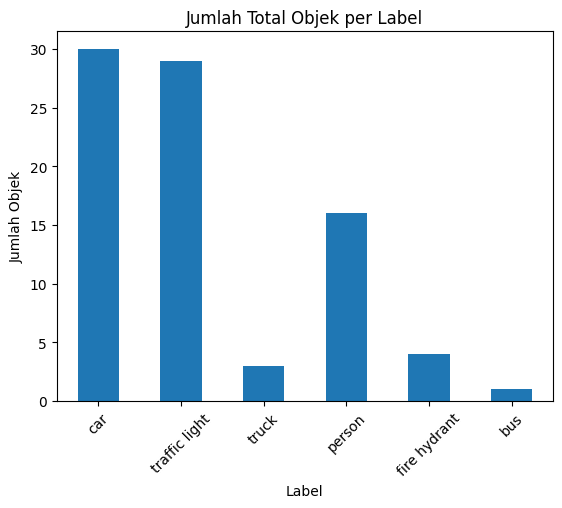

In [ ]:
# Mengubah kamus total_count_per_label menjadi DataFrame
df = pd.DataFrame.from_dict(total_count_per_label, orient='index', columns=['Jumlah Objek'])
df.index.name = 'Label'

# Membuat tabel
print("\nTabel Jumlah Total Object per Label:")
print(df)

# Membuat grafik batang
df.plot(kind='bar', legend=None)
plt.xlabel('Label')
plt.ylabel('Jumlah Objek')
plt.title('Jumlah Total Objek per Label')
plt.xticks(rotation=45)
plt.show()


## **Broader Impact**

Berdasarkan analisis deteksi objek menggunakan 
OpenCV dan YOLOv3 pada video tersebut, kami 
menemukan bahwa terdapat 83 objek yang berhasil terdeteksi 
secara keseluruhan. Objek yang paling banyak terdeteksi 
adalah mobil dengan jumlah 30 objek dan lampu lalu lintas 
dengan jumlah 29 objek. Deteksi objek yang teridentifikasi memiliki 
tingkat kepercayaan (confidence) minimal 0,7. Keterbatasan dalam penelitian ini yaitu tidak adanya custom dataset yang digunakan untuk membangun model YOLO versi terbaru sehingga kami menggunakan model YOLOv3 yang sudah tersedia di internet. Harapan kami dalam penelitian selanjutnya memiliki custom dataset yang sesuai serta memiliki komponen penelitian yang memadai agar hasil analisis dapat dilakukan secara mendalam.